Nathan Mohapatra  
njmohapatra@ucdavis.edu

# Homework 4
You can use pandas, numpy, sklearn, tensorflow, keras

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers, layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### 1: [50 pts]
Part a) Use the churn data set. Except for the Account Length, VMail Message, Day Mins, Day Calls, Eve Mins, Night Mins, Intl Mins, Intl Calls, CustServ Calls, Intl Plan, and Churn, drop the remaining columns from the dataset. Preprocess the data:

- Encode categorical features to numerical values using one-hot encoding.
- Use MinMaxScaler to transform your numerical attributes. One of the practices for training a Neural Network is to normalize your data to obtain a mean close to 0. Normalizing the data generally speeds up learning and leads to faster convergence.

Develop a 4-layer artificial neural network (ANN) and specifically a feed-forward multilayer perceptron (with sigmoid activations and MSE loss function) to perform binary classification to classify 'Churn' based on other variables. For this, split the data into training and testing set by 70:30 and use the training set to train the model and the test set to evaluate the model performance. Use sgd optimizer with no momentum and keep it simple. Please note that this is a binary classification problem so select the right number of nodes accordingly for the output layer. Use gridsearch to determine the number of nodes in the hidden layers. Train this toy model on a single iteration. Get the layer weights and loss from the model. You don’t need to use a callback since the current weights and loss will be available.

In [2]:
# read dataset into pandas dataframe
df = pd.read_csv('./../datasets/churn.txt', sep=',')
df.columns = ['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan', 'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls', 'Churn']
df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
# drop columns from dataset
df = df.drop(columns=['State', 'Area_Code', 'Phone', 'VMail_Plan', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Charge'])
df.head()

,Account_Length,Intl_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Night_Mins,Intl_Mins,Intl_Calls,CustServ_Calls,Churn
0,128,no,25,265.1,110,197.4,244.7,10.0,3,1,False.
1,107,no,26,161.6,123,195.5,254.4,13.7,3,1,False.
2,137,no,0,243.4,114,121.2,162.6,12.2,5,0,False.
3,84,yes,0,299.4,71,61.9,196.9,6.6,7,2,False.
4,75,yes,0,166.7,113,148.3,186.9,10.1,3,3,False.


Converting a binary variable that takes the values of [0, 1] into one-hot encoded values of [(0, 1), (1, 0)] is redundant and causes unnecessary dimensionality.

In [4]:
# encode categorical features to numerical values using one hot encoding
df.replace('yes', 'Yes', inplace=True)
df = pd.get_dummies(df, columns=['Intl_Plan'])
df = df.drop('Intl_Plan_no', axis=1)

df.replace('True.', 'True', inplace=True)
df = pd.get_dummies(df, columns=['Churn'])
df = df.drop('Churn_False.', axis=1)

# use MinMaxScaler to transform your numerical attributes
scaler = MinMaxScaler(feature_range=(-1,1)) # mean close to 0
df['Account_Length'] = scaler.fit_transform(df[['Account_Length']])
df['VMail_Message'] = scaler.fit_transform(df[['VMail_Message']])
df['Day_Mins'] = scaler.fit_transform(df[['Day_Mins']])
df['Day_Calls'] = scaler.fit_transform(df[['Day_Calls']])
df['Eve_Mins'] = scaler.fit_transform(df[['Eve_Mins']])
df['Night_Mins'] = scaler.fit_transform(df[['Night_Mins']])
df['Intl_Mins'] = scaler.fit_transform(df[['Intl_Mins']])
df['Intl_Calls'] = scaler.fit_transform(df[['Intl_Calls']])
df['CustServ_Calls'] = scaler.fit_transform(df[['CustServ_Calls']])

df.head()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Night_Mins,Intl_Mins,Intl_Calls,CustServ_Calls,Intl_Plan_Yes,Churn_True
0,0.049587,-0.019608,0.511403,0.333333,0.085510,0.191501,0.00,-0.7,-0.777778,0,0
1,-0.123967,0.019608,-0.078677,0.490909,0.075062,0.243679,0.37,-0.7,-0.777778,0,0
2,0.123967,-1.000000,0.387685,0.381818,-0.333517,-0.250134,0.22,-0.5,-1.000000,0,0
3,-0.314050,-1.000000,0.706956,-0.139394,-0.659610,-0.065627,-0.34,-0.3,-0.555556,1,0
4,-0.388430,-1.000000,-0.049601,0.369697,-0.184493,-0.119419,0.01,-0.7,-0.333333,1,0


In [5]:
# split dataset 70:30 for training and testing
train, test = train_test_split(df, train_size=0.7, random_state=1)

In [6]:
# grid search seed
random.seed(100)
np.random.seed(100)
tf.random.set_seed(100)

# grid search function (define and compile model)
def create_model(layer1, layer2):
    model = keras.Sequential()
    model.add(layers.Dense(layer1, input_dim=(train.shape[1] - 1), activation='sigmoid'))
    model.add(layers.Dense(layer2, activation='sigmoid'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='mse', optimizer='sgd',
                        metrics=['accuracy',
                                 keras.metrics.Precision(name='precision', thresholds=0.5),
                                 keras.metrics.Recall(name='recall', thresholds=0.5)])
    return model

# grid search
model = KerasClassifier(build_fn=create_model)
param_grid = {'layer1':[3, 5, 7], 'layer2':[3, 5, 7]} # hidden layer nodes
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(train.drop('Churn_True', axis=1), train['Churn_True'])
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

73/73 [==============================] - 1s 1ms/step - loss: 0.1377 - accuracy: 0.8691 - precision: 0.0000e+00 - recall: 0.0000e+00
Best: 0.8551148295402526 using {'layer1': 3, 'layer2': 3}


In [7]:
# grid search results
layer1 = 3
layer2 = 3

# define model
model1 = keras.Sequential(
    [
        keras.Input(shape=(train.shape[1] - 1)),
        layers.Dense(layer1, activation='sigmoid'),
        layers.Dense(layer2, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ]
)

# compile model
model1.compile(optimizer='sgd', loss='mse',
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision', thresholds=0.5),
                        keras.metrics.Recall(name='recall', thresholds=0.5)])

model1.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_139 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [8]:
# train model
result1 = model1.fit(train.drop('Churn_True', axis=1), train['Churn_True'], epochs=1, verbose=1) # single iteration

73/73 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.2054 - precision: 0.1288 - recall: 0.8821


In [9]:
# evaluate model performance
model1.evaluate(test.drop('Churn_True', axis=1), test['Churn_True'])

32/32 [==============================] - 1s 1ms/step - loss: 0.2338 - accuracy: 0.8550 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.23375877737998962, 0.8550000190734863, 0.0, 0.0]

In [10]:
# layer weights
print(f'Layer 1: {model1.layers[0].get_weights()[0]}')
print(f'Layer 2: {model1.layers[1].get_weights()[0]}')
print(f'Layer 3: {model1.layers[2].get_weights()[0]}')

Layer 1: [[-0.05637675 -0.5647651  -0.27263343]
 [-0.25584954  0.42403343 -0.57508254]
 [ 0.00850187 -0.4002832   0.07673649]
 [ 0.1122118  -0.21113579 -0.6187765 ]
 [-0.16781266  0.5243434   0.44536096]
 [-0.66065574  0.42733356 -0.15180345]
 [ 0.52230227  0.5815563   0.58191884]
 [ 0.0937864   0.09934616  0.27640748]
 [-0.44763735 -0.49233738 -0.57680845]
 [-0.07313597  0.37483498  0.49337614]]
Layer 2: [[-0.8751984  -0.0466514   0.07294091]
 [ 0.8910575   0.9841998   0.20228532]
 [-0.89929867  0.74391985 -0.41037107]]
Layer 3: [[ 0.27420518]
 [ 0.27168313]
 [-0.53132236]]


Part b) For the ANN in part a), calculate the first round of weight updates with back-propagation with paper and pencil for the two final layers (output to 2nd hidden layer, 2nd hidden layer to 1st hidden layer) for only the first sample.

Limit this calculation to only the weights corresponding to (i) the single output node and (ii) a single hidden node from the 2nd hidden layer. These weights also include the bias.

You can initialize all weights to zero except the weights that you are calculating, which can be initialized to 1. All nodes within the same layer will have the same weights and gradients.

Confirm that the numbers you calculated are the same as those produced by the code and provide both your calculations and the code output. Make sure that the loss function used in your hand calculation is the same as the one used in keras.

If your calculations do not agree, find out why. Provide both calculations made by hand (scanned image and using a calculator/computer to verify the results for each step is fine) and corresponding output from the program that shows that both are in agreement. Include all your assumptions in your answer.

For this problem, it is sufficient to calculate a single incoming weight and the bias for each layer. This is because we are initializing all layers of the network to non-random, identical values (per layer). As a result the gradients will be the same across each layer.

### Hints:

#### Goal:
- Must provide hand calculations
    - Output node (incoming weights + bias)
    - 1 node in 2nd hidden layer (incoming weights + bias)
- All weights will be the same per layer, same for bias
- Must provide keras calculated weights

#### More hints:
- Initialize the weights and biases for Hidden Layer 1 to 0. Initialize the weights and biases for Hidden Layer 2 and the Output Layer to 1
- Calculate the forward pass
- Note that since Hidden Layer 1 is initialized to 0, it doesn’t depend upon the values of the input
- All neuron values for each layer will be the same since the weights are uniform across the layer
- Calculate the MSE of the forward pass
- Compare this error to your keras output, it should match
- Calculate the backward pass
    - Compare the updated weights against your keras model weights
    - Since the layers are uniform, the gradients should be uniform for the layer
    - Here is a relevant quote from Stanford’s CS231n on weight initialization: https://cs231n.github.io/neural-networks-2/#init (Links to an external site.) Pitfall: all zero initialization. Let's start with what we should not do. Note that we do not know what the final value of every weight should be in the trained network, but with proper data normalization it is reasonable to assume that approximately half of the weights will be positive and half of them will be negative. A reasonable-sounding idea then might be to set all the initial weights to zero, which we expect to be the “best guess” in expectation. This turns out to be a mistake, because if every neuron in the network computes the same output, then they will also all compute the same gradients during backpropagation and undergo the exact same parameter updates. In other words, there is no source of asymmetry between neurons if their weights are initialized to be the same.

In [11]:
# first sample
train.head(1)

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Night_Mins,Intl_Mins,Intl_Calls,CustServ_Calls,Intl_Plan_Yes,Churn_True
1642,-0.190083,-1.0,-0.687571,0.115152,-0.048666,-0.075309,-0.25,-0.7,-0.777778,0,0


### Handwritten Calculations

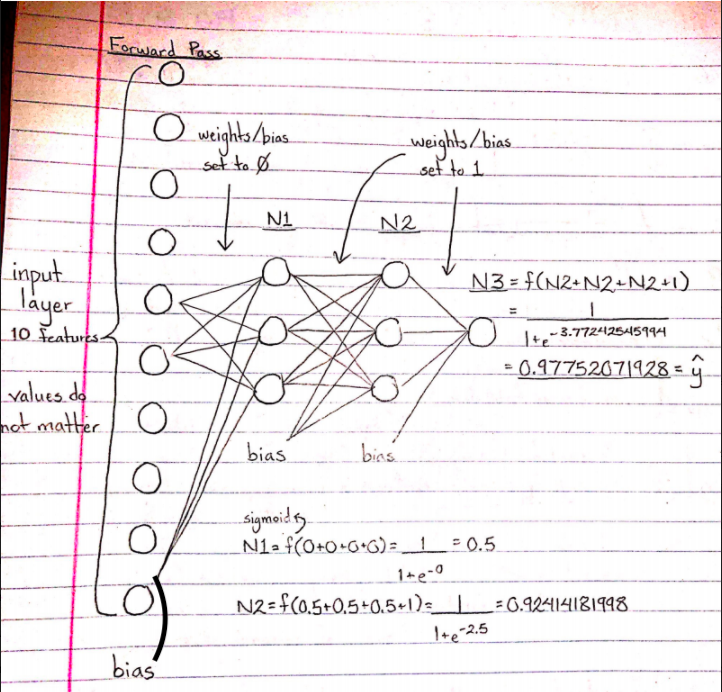

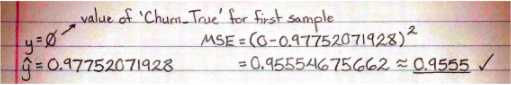

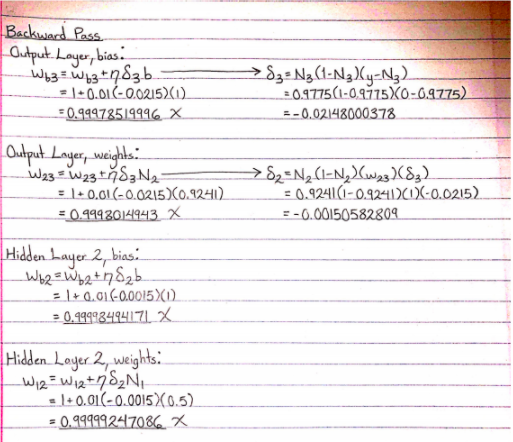

### Programmatic Calculations

In [12]:
# define model
model2 = keras.Sequential(
    [
        keras.Input(shape=(train.shape[1] - 1)),
        # initialize weights and biases to 0
        layers.Dense(layer1, activation='sigmoid', kernel_initializer='zeros', bias_initializer='zeros'),
        # initialize weights and biases to 1
        layers.Dense(layer2, activation='sigmoid', kernel_initializer='ones', bias_initializer='ones'),
        layers.Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer='ones')
    ]
)

# compile model
model2.compile(optimizer='sgd', loss='mse',
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision', thresholds=0.5),
                        keras.metrics.Recall(name='recall', thresholds=0.5)])

model2.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_142 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train model
result2 = model2.fit(train.drop('Churn_True', axis=1).head(1), train['Churn_True'].head(1), verbose=1) # first sample

1/1 [==============================] - 1s 755ms/step - loss: 0.9555 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


In [14]:
# updated weights
print(f'Output Layer: {model2.layers[2].get_weights()[0][0][0]}')
print(f'Hidden Layer 2: {model2.layers[1].get_weights()[0][0][0]}')

Output Layer: 0.9996029734611511
Hidden Layer 2: 0.9999849200248718


In [15]:
# updated biases
print(f'Output Layer: {model2.layers[2].get_weights()[1][0]}')
print(f'Hidden Layer 2: {model2.layers[1].get_weights()[1][0]}')

Output Layer: 0.9995704293251038
Hidden Layer 2: 0.9999698996543884


### Comparisons

My handwritten and programmatic (keras model) calculations of the mean squared error (MSE) of the forward pass MATCH after rounding the handwritten calculation.

My handwritten and programmatic (keras model) calculations of the updated weights and biases following the backward pass (from the Output Layer to the Second Hidden Layer and from the Second Hidden Layer to the First Hidden Layer) DO NOT MATCH. However, they differ by only ten-thousandths and would match if I rounded the handwritten calculations to the thousandths decimal place. Is this slight difference of any significance?

I assume that all mismatches are due to rounding errors. In my handwritten calculations, I did not round the numbers until I got the final result. I am unsure of when the keras model rounds its values.

### 2: [20 pts]
Create 2 dummy input samples and use the ANN model which you trained in Q1a to classify the output. Include your code and the classified output.

### Hints:

#### Goal:
- Test classifer with novel data
- Test with a sample that is within the range of observed features
- Test with a sample that is outside the range of observed features (generalization performance)
- Conditions:
    - +Samples can be created in any way
    - +Samples shouldn't be identical

In [16]:
# define model
model3 = keras.Sequential(
    [
        keras.Input(shape=(train.shape[1] - 1)),
        layers.Dense(layer1, activation='sigmoid'),
        layers.Dense(layer2, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
    ]
)

# compile model
model3.compile(optimizer='adam', loss='mse', # use adam to converge
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision', thresholds=0.5),
                        keras.metrics.Recall(name='recall', thresholds=0.5)])

model3.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_145 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [17]:
# train model
result3 = model3.fit(train.drop('Churn_True', axis=1), train['Churn_True'], epochs=200, batch_size=32, verbose=1)

Epoch 1/200
73/73 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.1309 - precision: 0.1309 - recall: 1.0000
Epoch 2/200
73/73 [==============================] - 0s 1ms/step - loss: 0.2943 - accuracy: 0.1516 - precision: 0.1516 - recall: 1.0000
Epoch 3/200
73/73 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.3091 - precision: 0.1358 - recall: 0.7322
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.8581 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/200
73/73 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 0.8646 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/200
73/73 [==============================] - 0s 1ms/step - loss: 0.1789 - accuracy: 0.8627 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 7/200
73/73 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.8618 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 8/200
73/7

73/73 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.8600 - precision: 0.5921 - recall: 0.2473
Epoch 116/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1038 - accuracy: 0.8578 - precision: 0.6266 - recall: 0.3331
Epoch 117/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.8649 - precision: 0.6412 - recall: 0.3216
Epoch 118/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0930 - accuracy: 0.8706 - precision: 0.6114 - recall: 0.3386
Epoch 119/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0923 - accuracy: 0.8696 - precision: 0.6175 - recall: 0.3074
Epoch 120/200
73/73 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.8674 - precision: 0.5765 - recall: 0.3007   
Epoch 121/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0926 - accuracy: 0.8667 - precision: 0.5515 - recall: 0.3188 
Epoch 122/200
73/73 [=======================

In [18]:
sample1 = [0.5, -0.5, 0, 0.5, -0.5, 0, 0.5, -0.5, 0, 0] # within range of observed features
prediction1 = model3.predict(np.array(sample1).reshape(1,-1))
prediction1[0][0]

0.09504685

In [19]:
sample2 = [1.5, -1.5, 2, 1.5, -1.5, 2, 1.5, -1.5, 2, 2] # outside range of observed features
prediction2 = model3.predict(np.array(sample2).reshape(1,-1))
prediction2[0][0]

0.73131406

In [20]:
print(f'Sample 1 is classified as {(prediction1[0][0] >= 0.5).astype(int)} or Churn_{prediction1[0][0] >= 0.5}')
print(f'Sample 2 is classified as {(prediction2[0][0] >= 0.5).astype(int)} or Churn_{prediction2[0][0] >= 0.5}')

Sample 1 is classified as 0 or Churn_False
Sample 2 is classified as 1 or Churn_True


### 3: [20 pts]
Change the hidden layer activation functions to ReLU, the output layer activation to softmax, and the loss function to cross-entropy. Is this a better choice?

### Hints:

#### Goal:
- Compare model hyperparameters
- Conditions:
    - Recompile model using same layer sizes as Q1
    - Use ReLU for hidden layers and softmax for output layer
    - Must report precision and recall
    - Use reasonable threshold values
    - Report both the test and training precision and recall
    - Must answer which model is better
    - Justify using metrics or other concrete reasoning (activation function, etc)
    - Answers will differ based upon optimizer, layer sizes, training sizes, etc

In [21]:
# define model
model4 = keras.Sequential(
    [
        keras.Input(shape=(train.shape[1] - 1)),
        layers.Dense(layer1, activation='relu'),
        layers.Dense(layer2, activation='relu'),
        layers.Dense(1, activation='softmax')
    ]
)

# compile model
model4.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy',
                        keras.metrics.Precision(name='precision', thresholds=0.5),
                        keras.metrics.Recall(name='recall', thresholds=0.5)])

model4.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 3)                 33        
_________________________________________________________________
dense_148 (Dense)            (None, 3)                 12        
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [22]:
result4 = model4.fit(train.drop('Churn_True', axis=1), train['Churn_True'], validation_split=0.8, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
15/15 [==============================] - 2s 79ms/step - loss: 0.7003 - accuracy: 0.1213 - precision: 0.1213 - recall: 1.0000 - val_loss: 0.6905 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6873 - accuracy: 0.1346 - precision: 0.1346 - recall: 1.0000 - val_loss: 0.6788 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6753 - accuracy: 0.1306 - precision: 0.1306 - recall: 1.0000 - val_loss: 0.6669 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.6640 - accuracy: 0.1548 - precision: 0.1548 - recall: 1.0000 - val_loss: 0.6543 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 0.6495 - accuracy: 0.1378 - precis

Epoch 74/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3796 - accuracy: 0.1433 - precision: 0.1433 - recall: 1.0000 - val_loss: 0.3911 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 75/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3773 - accuracy: 0.1340 - precision: 0.1340 - recall: 1.0000 - val_loss: 0.3904 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 76/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4067 - accuracy: 0.1550 - precision: 0.1550 - recall: 1.0000 - val_loss: 0.3896 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 77/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3663 - accuracy: 0.1381 - precision: 0.1381 - recall: 1.0000 - val_loss: 0.3887 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 78/200
15/15 [==============================] - 0s 7ms/step - loss: 0.3610 - accuracy: 0.1343 - pr

15/15 [==============================] - 0s 7ms/step - loss: 0.2670 - accuracy: 0.1134 - precision: 0.1134 - recall: 1.0000 - val_loss: 0.3481 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 147/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2859 - accuracy: 0.1183 - precision: 0.1183 - recall: 1.0000 - val_loss: 0.3475 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 148/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3053 - accuracy: 0.1450 - precision: 0.1450 - recall: 1.0000 - val_loss: 0.3473 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 149/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2842 - accuracy: 0.1292 - precision: 0.1292 - recall: 1.0000 - val_loss: 0.3467 - val_accuracy: 0.1478 - val_precision: 0.1478 - val_recall: 1.0000
Epoch 150/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3363 - accuracy: 0.1444 - precision: 

In [23]:
# training precision and recall
{x : result4.history[x][-1] for x in result4.history.keys() if x in ['precision', 'recall', 'val_precision', 'val_recall']}

{'precision': 0.1330472081899643,
 'recall': 1.0,
 'val_precision': 0.14783073961734772,
 'val_recall': 1.0}

In [24]:
# testing precision and recall
model4.evaluate(train.drop('Churn_True', axis=1), train['Churn_True'])

73/73 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.1449 - precision: 0.1449 - recall: 1.0000


[0.3244372308254242, 0.1448778361082077, 0.1448778361082077, 1.0]

### Must answer which model is better
The previous model is better, because it has a lower loss (with mean squared error rather than cross entropy) and a higher accuracy and precision score. However, this model has a recall score of 1.0, which means that there were no False Negatives (FNs).

I think that it is fine that the hidden layers use the ReLU activation function, but I do not think that the output layer should use the softmax activation function. The softmax activation function is typically used for multiclass classification; this is a binary classification problem and, therefore, the output layer should use the sigmoid activation function.

I am not sure how the optimizer, layer sizes, or training sizes affect the model performance. I used the adam optimizer because, unlike stochastic gradient descent (sgd), it converges and provides nonzero precision and recall scores.

### 4: [10 pts]
Describe the trade-off between a large hidden layer and a small one. What are the benefits, what are the drawbacks? Also, describe the benefits and drawbacks of using large or small values for learning rate in a NN.

A larger hidden layer will be sufficient for more problems (with diminishing returns), but also increases the complexity of the model—and increased computational complexity will make the model more resource intensive and more difficult to understand. A larger hidden layer should only be used when necessitated by the problem.

The learning rate in a neural network controls how quickly the model adapts to the problem. Smaller learning rates result in smaller changes made to the weights each update and require more training epochs, whereas larger learning rates result in larger changes made to the weights each update and require less training epochs. A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the model to become "stuck."

Both hyperparameters (hidden layer size and learning rate) should be tuned for optimal model performance.